In [38]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os 
from scipy.special import expit
import scipy as sci

import cv2
import time

2


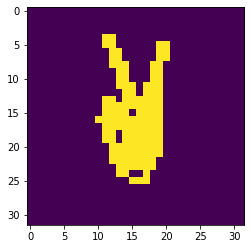

In [39]:
# test 데이터 정리
add="test"

list=os.listdir(add)
test_label=list[:]
test_data=[]

z=0
while z<len(test_label):
    test_label[z]=test_label[z][-6]

    add1 =add+"/"+list[z]

    img_bgr = cv2.imread(add1)
    img_bitwise_not_bgr = cv2.bitwise_not(img_bgr)
    img_bitwise_not_bgr2gray = cv2.cvtColor(img_bitwise_not_bgr, cv2.COLOR_BGR2GRAY)
    ret, img_binary = cv2.threshold(img_bitwise_not_bgr2gray, 150,255,cv2.THRESH_BINARY)
    image=255-img_binary

    # image_pil = Image.open(add1)
    # image = np.array(image_pil)

    a=np.arange(0,128,2)
    image = np.delete(image,(a), axis = 0)
    image = np.delete(image,(a), axis = 1)
    a=np.arange(0,64,2)
    image = np.delete(image,(a), axis = 0)
    image = np.delete(image,(a), axis = 1)

    image = (image / 255.0 * 0.99) + 0.01
    image=image.reshape(1,-1)
    test_data.append(image)
    
    z+=1

##############################################################################
# train 데이터 정리
add="train"

list=os.listdir(add)
train_label=list[:]
train_data=[]

z=0
while z<len(train_label):
    train_label[z]=train_label[z][-6]

    add1 =add+"/"+list[z]

    img_bgr = cv2.imread(add1)
    img_bitwise_not_bgr = cv2.bitwise_not(img_bgr)
    img_bitwise_not_bgr2gray = cv2.cvtColor(img_bitwise_not_bgr, cv2.COLOR_BGR2GRAY)
    ret, img_binary = cv2.threshold(img_bitwise_not_bgr2gray, 150,255,cv2.THRESH_BINARY)
    image=255-img_binary

    # image_pil = Image.open(add1)
    # image = np.array(image_pil)

    a=np.arange(0,128,2)
    image = np.delete(image,(a), axis = 0)
    image = np.delete(image,(a), axis = 1)
    a=np.arange(0,64,2)
    image = np.delete(image,(a), axis = 0)
    image = np.delete(image,(a), axis = 1)

    image = (image / 255.0 * 0.99) + 0.01
    image=image.reshape(1,-1)
    train_data.append(image)
    
    z+=1
##############################################################################
# 학습 카겟 만들기
targets=[]
z=0
while z<len(train_label):
    target=np.zeros(6)+.01
    target[int(train_label[z])]=.99
    targets.append(target)
    z+=1


a=int(np.random.choice(len(list),1))
# plt.imshow(train_data[a])
plt.imshow(train_data[a].reshape(32,32))
# print(np.shape(train_data[a]))
print(train_label[a])

4


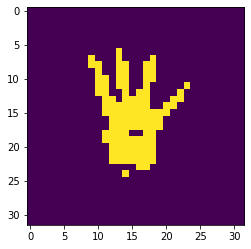

In [40]:
a=int(np.random.choice(len(list),1))
# plt.imshow(train_data[a])
plt.imshow(train_data[a].reshape(32,32))
# print(np.shape(train_data[a]))
print(train_label[a])

In [41]:
# 데이커 안에 빈것들을 채울수있을까?
# 일단 돌려보고 안되면 해보자


# I = cv2.imread('E:\\Mukul\\others\\stof.png') #input image
# #I.shape

# I_cnt = np.where(I[:,:,2] == 255) #location of your bounding box region
# I_mask = np.zeros_like(I[:,:,2])  # mask for the input image

# I_mask[list(I_cnt[0]), list(I_cnt[1])] = 255
# plt.imshow(I_mask, cmap = 'gray')


# I_cnt1, _ = cv2.findContours(I_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# np.array(I_cnt1).shape # (1, 1420, 1, 2)


# cv2.fillConvexPoly(I_mask, I_cnt1[0], 255)
# plt.imshow(I_mask,cmap = 'gray')



# a=int(np.random.choice(len(list),1))
# # plt.imshow(train_data[a])
# plt.imshow(train_data[a].reshape(32,32))
# # print(np.shape(train_data[a]))

# print(train_label[a])
# print(train_data[a])

In [42]:
# 신경망 만들기
class neural_network:
    def __init__(self, inputnodes, hiddennodes1, hiddennodes2, outputnodes, learninggrate):
        self.inodes=inputnodes
        self.hnodes1=hiddennodes1
        self.hnodes2=hiddennodes2
        self.onodes=outputnodes

        self.wih1=np.random.normal(.0, pow(self.hnodes1, -.5), (self.hnodes1, self.inodes))
        self.wh1h2=np.random.normal(.0, pow(self.hnodes2, -.5), (self.hnodes2, self.hnodes1))
        self.wh2o=np.random.normal(.0, pow(self.onodes, -.5), (self.onodes, self.hnodes2))

        self.lr=learninggrate

        self.activation_fun=lambda x : expit(x)
        self.inverse_activation_function = lambda x: sci.special.logit(x)

        pass

    def query(self, input_list): #질의
        inputs=np.array(input_list, ndmin=2).T

        hidden1_inputs=np.dot(self.wih1, inputs)
        hidden1_outputs=self.activation_fun(hidden1_inputs)
        
        hidden2_inputs=np.dot(self.wh1h2, hidden1_outputs)
        hidden2_outputs=self.activation_fun(hidden2_inputs)

        final_input=np.dot(self.wh2o ,hidden2_outputs)
        final_outputs=self.activation_fun(final_input)

        return final_outputs


    def train(self, input_list, target): # 학습
        inputs=np.array(input_list, ndmin=2).T
        target=np.array(target, ndmin=2).T

        hidden1_inputs=np.dot(self.wih1, inputs)
        hidden1_outputs=self.activation_fun(hidden1_inputs)
        
        hidden2_inputs=np.dot(self.wh1h2, hidden1_outputs)
        hidden2_outputs=self.activation_fun(hidden2_inputs)

        final_input=np.dot(self.wh2o ,hidden2_outputs)
        final_outputs=self.activation_fun(final_input)

        # 오차 정의
        output_err=target-final_outputs
        hidden2_err=np.dot(self.wh2o.T, output_err)
        hidden1_err=np.dot(self.wh1h2.T, hidden2_err)

        # oh2 역전파
        delta_w1=self.lr*np.dot(output_err*final_outputs*(1-final_outputs), hidden2_outputs.T)
        self.wh2o=self.wh2o+delta_w1
        
        # h2h1 역전파
        delta_w1=self.lr*np.dot(hidden2_err*hidden2_outputs*(1-hidden2_outputs), hidden1_outputs.T)
        self.wh1h2=self.wh1h2+delta_w1

        # h1i역전파
        delta_w2=self.lr*np.dot(hidden1_err*hidden1_outputs*(1-hidden1_outputs), inputs.T)
        self.wih1=self.wih1+delta_w2
        pass

    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = np.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)
        # calculate the signal out of the hidden2 layer
        hidden_outputs = np.dot(self.wh2o.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01

        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)
        # calculate the signal out of the hidden1 layer
        hidden_outputs = np.dot(self.wh1h2.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = np.dot(self.wih1.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

In [43]:
# 신경망 정의
input_nodes=1024
hiddennodes1=1500
hiddennodes2=1500
outputnodes=6

learning_rate=0.01

n=neural_network(input_nodes, hiddennodes1, hiddennodes2, outputnodes, learning_rate)
##############################################################################
# 학습
z=0
while z<len(train_data):
    # print(z)
    n.train(train_data[z], targets[z])
    # print(n.wh2o)
    z+=1
np.save("W/wih1", n.wih1)
np.save("W/wh1h2", n.wh1h2)
np.save("W/wh2o", n.wh2o)
##############################################################################
# 평가
z=0
h=0
while z<len(test_data):
    # a=int(np.random.choice(len(test_data),1))
    a=z
    b=n.query(test_data[int(a)])
    # print(b)
    # print(np.shape(test_data[a]))
    if int(test_label[a]) == np.argmax(b):pass
    else:
        # print(np.argmax(b))
        # print(test_label[a])
        # plt.imshow(test_data[a].reshape(32,32))
        # print(z)
        h+=1
    z+=1
print(h)
print("정확도:", 1-h/len(test_label))


os.system("say done")

12
정확도: 0.9966666666666667


0

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


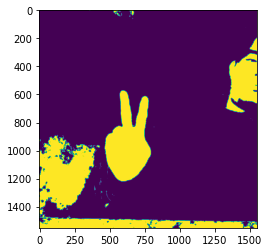

In [59]:
# 사진찍기

import cv2
import time
import os
from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt

cap = cv2.VideoCapture(0)                       # 0번 카메라 연결

frameWidth = 32
frameHeight = 32
cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(1,128)

time.sleep(3)

while True:

    os.system( "say  1" )
    os.system( "say  2" )
    os.system( "say  3" )
    os.system( "say  가위" )
    time.sleep(.05)
    os.system( "say  바위" )
    time.sleep(.05)
    os.system( "say  보" )
    
    ret, frame = cap.read()                 # 카메라 프레임 읽기
    cv2.imshow('camera',frame)          # 프레임 화면에 표시
    # if ret:
    if 1:            # 아무 키나 누르면
        #####################################################
        # frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame=cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # frame = cv2.flip(frame,0)   # 상하 반전
        cv2.imwrite('photo.jpg', frame) # 프레임을 'photo.jpg'에 저장
        break
    # else:
    #     print('no frame!')
    #     break
cap.release()
cv2.destroyAllWindows()
plt.imshow(frame)





import numpy as np

lower = np.array([0,48,80], dtype="uint8")

upper = np.array([20,255,255], dtype="uint8")

frame = cv2.inRange(frame, lower, upper)
plt.imshow(frame)

contours, hierarchy = cv2.findContours(frame, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
# 가장 큰 영역 찾기
max = 0
maxcnt = None
for cnt in contours :
    area = cv2.contourArea(cnt)
    if(max < area) :
        max = area
        maxcnt = cnt

mask = np.zeros(frame.shape).astype(frame.dtype)

color = [255, 255, 255]

# 경계선 내부 255로 채우기

cv2.fillPoly(mask, [maxcnt], color)
plt.imshow(frame)

print(frame)


(32, 32)
(1, 1024)
[[30.89040259]
 [ 0.10826601]
 [ 2.51372774]
 [ 0.44011379]
 [ 0.52761662]
 [98.93542509]]
5
scissors


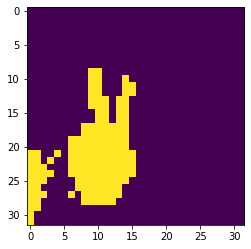

In [60]:
# 사진 편집
##############################################################################
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

image = np.array(frame)
# 크기 조절
image = np.delete(image,np.arange(263), axis = 0)
image = np.delete(image,-np.arange(265), axis = 0)
image = np.delete(image,np.arange(263), axis = 1)
image = np.delete(image,-np.arange(265), axis = 1)

b=int(np.shape(image)[0])
a=np.arange(0,b,2)
image = np.delete(image,(a), axis = 0)
image = np.delete(image,(a), axis = 1)

b=int(np.shape(image)[0])
a=np.arange(0,b,2)
image = np.delete(image,(a), axis = 0)
image = np.delete(image,(a), axis = 1)

b=int(np.shape(image)[0])
a=np.arange(0,b,2)
image = np.delete(image,(a), axis = 0)
image = np.delete(image,(a), axis = 1)

b=int(np.shape(image)[0])
a=np.arange(0,b,2)
image = np.delete(image,(a), axis = 0)
image = np.delete(image,(a), axis = 1)

b=int(np.shape(image)[0])
a=np.arange(0,b,2)
image = np.delete(image,(a), axis = 0)
image = np.delete(image,(a), axis = 1)

# 선명하게
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]]) # 커널을 만듭니다.

# 이미지를 선명하게 만듭니다.
# image=np.reshape(image,(32,32))
image = cv2.filter2D(image, -1, kernel)


print(np.shape(image))
plt.imshow(image)
##############################################################################
image = (image / np.max(image) * 0.99) + 0.01

image=image.reshape(1,-1)
print(np.shape(image))

asd=n.query(image)
re=np.argmax(asd)
print(100*asd)
print(re)

if re==2:
    os.system("say rock")
    print("rock")
if re==1:
    os.system("say rock")
    print("rock")
if re==0:
    os.system("say Paper")
    print("Paper")
if re==4 :
    os.system("say scissors")
    print("scissors")
if re==5 :
    os.system("say scissors")
    print("scissors")

# 추가 학습 시키기
# target=np.zeros(6)+.01
# target[0]=.99
# n.train(image, target)


In [46]:
image_data = n.backquery(image)

# plot image data
plt.imshow(image_data.reshape(32,32))#, cmap='Greys', interpolation='None')

ValueError: shapes (1500,6) and (1024,1) not aligned: 6 (dim 1) != 1024 (dim 0)